# Домашнее задание № 0
Вам необходимо провести анализ данных и с помощью него ответить на поставленные вопросы. 

# Исходные данные
Этот набор данных представляет собой описание около 1 миллиона треков с платформы Spotify. Скачайте датасет и ознакомьтесь с описанием данных в [источнике](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data).

# Вопросы

## Анализ данных
С помощью работы с типом данных DataFrame из библиотеки pandas ответье на поставленные вопросы

In [1]:
import pandas as pd
path = 'spotify_data.csv'
df = pd.read_csv(path, index_col=0)

### 1. Сколько уникальных исполнителей и сколько уникальных жанров содержится в датасете?

**Результат**: Код и текстовый ответ на вопрос в формате

```
Уникальных исполнителей: <ответ>
Уникальных жанров: <ответ>
```

In [2]:
uniqur_artistd = df['artist_name'].nunique()
uniqur_g = df['genre'].nunique()
print('Уникальных исполнителей: ', uniqur_artistd)
print('Уникальных жанров: ', uniqur_g)

Уникальных исполнителей:  64158
Уникальных жанров:  82


### 2. Есть ли в данных пропуски? Если да, предложите способ их заполнения и реализуйте его

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько пропусков> - <Описание способа заполнения> (Если были пропуски)
```


In [3]:
#df.isnull().sum()
method = "interpolate с'pad' то есть заполнение уже существующими значениями"
answer=[]
for column in df.columns:
    missing = df[column].isnull().sum()
    if missing > 0:
        answer.append(f"{column} - {missing} - {method}")
    else:
        answer.append(f"{column} - {missing}")
df.interpolate(method='pad', axis=0)
for a in answer:
    print(a)

artist_name - 15 - interpolate с'pad' то есть заполнение уже существующими значениями
track_name - 1 - interpolate с'pad' то есть заполнение уже существующими значениями
track_id - 0
popularity - 0
year - 0
genre - 0
danceability - 0
energy - 0
key - 0
loudness - 0
mode - 0
speechiness - 0
acousticness - 0
instrumentalness - 0
liveness - 0
valence - 0
tempo - 0
duration_ms - 0
time_signature - 0


### 3. Есть ли признаки, которые не отвечают указанным в описании ограничениям? Если есть, то замените их

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько не соответствующих ограничениям данных> - <Описание способа замены> (Если были некорректные данные)
```

In [4]:
result = []
parameters = [
    {
        'name': 'popularity',
        'min': 0,
        'max': 100,
        'description':  'median() - замена некорректных значений на медиану',
        'method': lambda: df['popularity'].median()
    },
    {
        'name': 'year',
        'min': 2000,
        'max': 2023,
        'description':  'median() - замена некорректных значений на медиану',
        'method': lambda: df['year'].median()
    },
    {
        'name': 'danceability',
        'min': 0.0,
        'max': 1.0,
        'description':  'median() - замена некорректных значений на медиану',
        'method': lambda: df['danceability'].median()
    },
    {
        'name': 'energy',
        'min': 0.0,
        'max': 1.0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['energy'].median()
    },
    {
        'name': 'key',
        'min': -11,
        'max': -1,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['key'].median()
    },
    {
        'name': 'loudness',
        'min': -60,
        'max': 0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['loudness'].median()
    },
    {
        'name': 'mode',
        'min': 0,
        'max': 1,
        'description': 'mode() - замена некорректных значений на моду',
        'method': lambda: df['mode'].mode()[0]
    },
    {
        'name': 'speechiness',
        'min': 0.0,
        'max': 1.0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['speechiness'].median()
    },
    {
        'name': 'acousticness',
        'min': 0.0,
        'max': 1.0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['acousticness'].median()
    },
    {
        'name': 'instrumentalness',
        'min': 0.0,
        'max': 1.0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['instrumentalness'].median()
    },
    {
        'name': 'liveness',
        'min': 0.0,
        'max': 1.0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['liveness'].median()
    },
    {
        'name': 'valence',
        'min': 0.0,
        'max': 1.0,
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['valence'].median()
    },
    {
        'name': 'tempo',
        'min': 0,
        'max': float('inf'),
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['tempo'].median()
    },
     {
        'name': 'time_signature',
        'min': 3,
        'max': 7,
        'description': 'mode() - замена некорректных значений на моду',
        'method': lambda: df['time_signature'].mode()[0]
    },
     {
        'name': 'duration_ms',
        'min': 1,
        'max': float('inf'),
        'description': 'median() - замена некорректных значений на медиану',
        'method': lambda: df['duration_ms'].median()
    }
]

for param in parameters:
    name = param['name']
    minval = param['min']
    maxval = param['max']
    description = param['description']
    method = param['method']
    
    os = df[~df[name].between(minval, maxval)]
    num = os.shape[0]
    
    if num > 0:
        df.loc[os.index, name] = method()
        result.append(f"{name} - {num} - {description}")
    else:
        result.append(f"{name} - 0")
for i in result:
    print(i)

popularity - 0
year - 0
danceability - 0
energy - 0
key - 1159764 - median() - замена некорректных значений на медиану
loudness - 1198 - median() - замена некорректных значений на медиану
mode - 0
speechiness - 0
acousticness - 0
instrumentalness - 0
liveness - 0
valence - 0
tempo - 0
time_signature - 13888 - mode() - замена некорректных значений на моду
duration_ms - 0


## Визуальный анализ
Ответом на вопрос должен быть график или несколько графиков в одной фигуре (картинке), с минимальной подписью

In [5]:
import plotly.express as px
import matplotlib.pyplot as plt

### 1. Как Energy зависит от Danceability? Как зависит Loudness от Energy? Как эти параметры влияют на Valence?

**Результат**: Код, реализующий графики:

- Зависимость Energy от Danceability
- Зависимость Loudness от Energy
- Зависимость Valence от Energy, зависимость Valence от Danceability; в одной оси фигуры
- Зависимость Valence от Loudness
- Матрица корреляции Energy, Danceability, Loudness, Valence

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Нарисовать стрелки и подписи к ним на графике, обращающие внимание на ключевые моменты, позволяющие сделать выводы о зависимостях. 

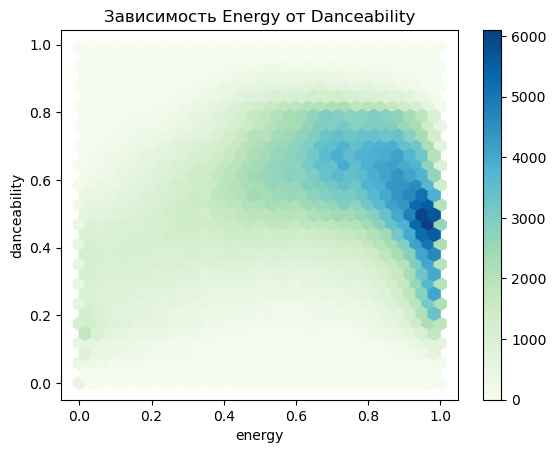

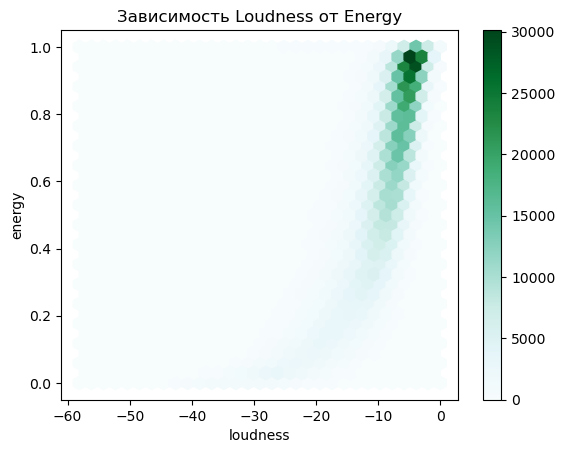

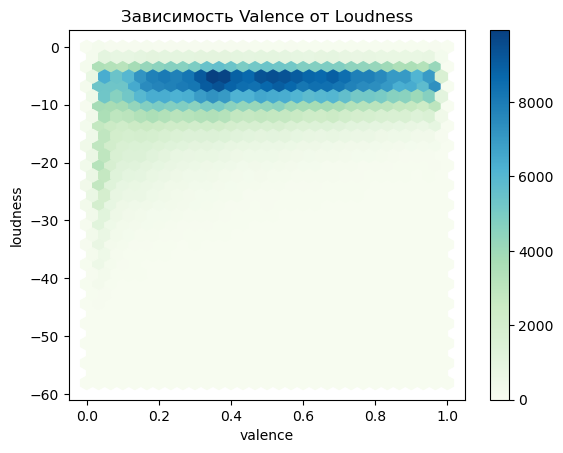

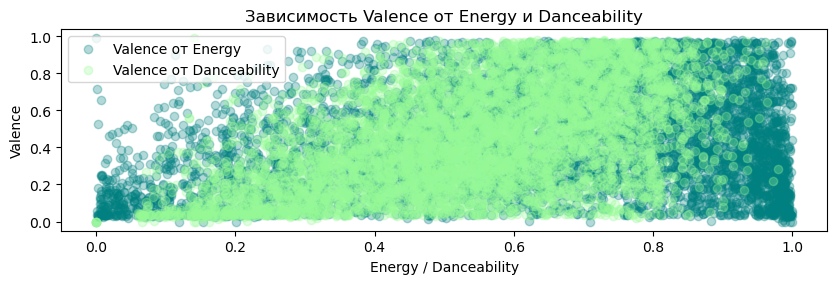

In [6]:
df.plot('energy', 'danceability', kind='hexbin',title='Зависимость Energy от Danceability',colormap='GnBu', gridsize=30)
df.plot('loudness', 'energy', kind='hexbin',title='Зависимость Loudness от Energy',colormap='BuGn', gridsize=30)
df.plot('valence','loudness', kind='hexbin',title='Зависимость Valence от Loudness',colormap='GnBu', gridsize=30)
fig = plt.figure(figsize=(11, 10))
ax = plt.subplot2grid((11, 10), (5, 1), rowspan=3, colspan=10)
df_s=df.sample(frac=0.005)
ax.scatter(x='energy', y='valence', data=df_s, label='Valence от Energy', color='teal', alpha=0.3)
ax.scatter(x='danceability', y='valence', data=df_s, label='Valence от Danceability', color='palegreen', alpha=0.3)
ax.set_title('Зависимость Valence от Energy и Danceability')
ax.set_xlabel('Energy / Danceability')
ax.set_ylabel('Valence')
ax.legend()
plt.show()
corr_matrix = df[['energy', 'danceability','loudness','valence']].corr()
px.imshow(corr_matrix,color_continuous_scale='BuGn', range_color=[0.1,1],title='Матрица корреляции Energy, Danceability, Loudness, Valence')

#### Сделайте общий вывод о том, зависит ли настроение трека (Valence) от проанализированных параметров:
**Результат**: Текстовый ответ на вопрос.

*Корреляция между Valence и Danceability самая высокая так как коэффициент корреляции 0.519; loudness менее связана с Valence (коэф корреляции 0.295); наименьшее связана Valence с Energy (коэф корреляции 0.247)*

### 2. С годами музыка становится дольше или быстрее?

**Результат**: Код, реализующий графики:

- Зависимость средней продолжительности трека от года, с линией тренда
- Изменение средней продолжительности топ-5 самых длинных треков года
- Изменение средней продолжительности топ-5 самых коротких треков года

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

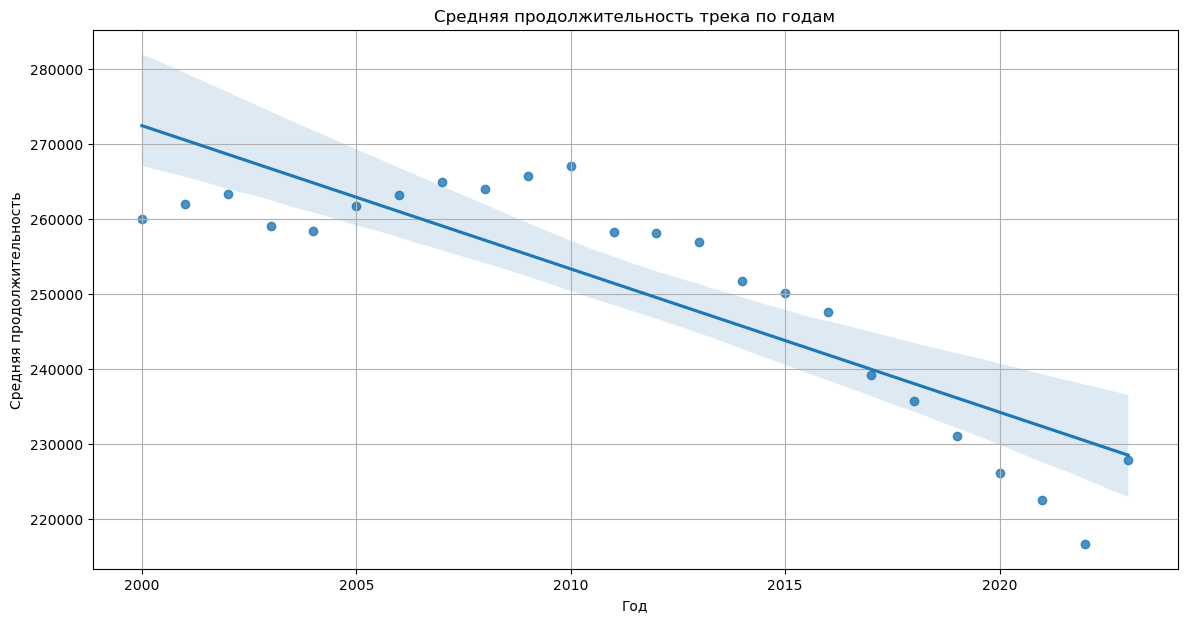

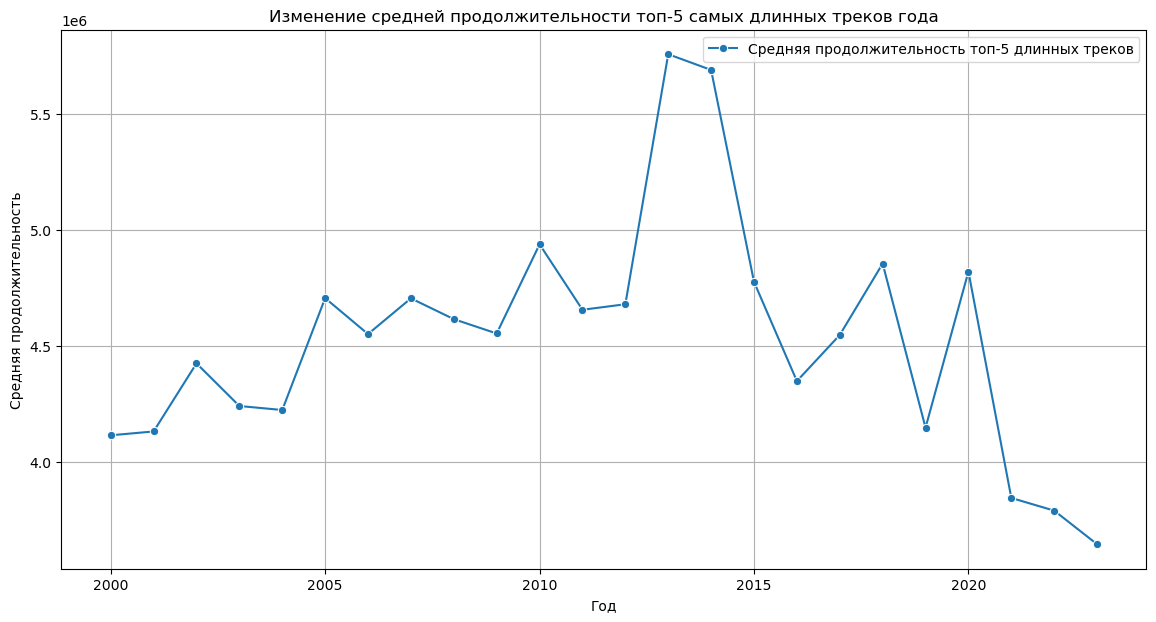

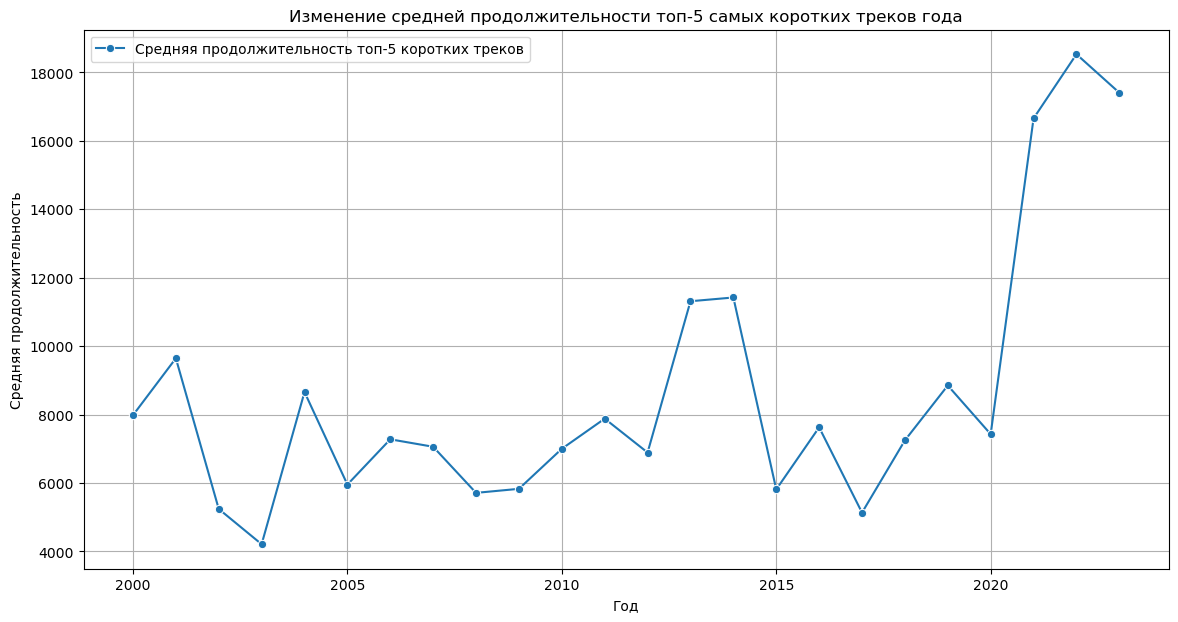

In [7]:
avg_duration = df.groupby('year')['duration_ms'].mean().reset_index() #dataframe with year and mean duration
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.regplot(x='year', y='duration_ms', data=avg_duration, marker='o')
plt.title('Средняя продолжительность трека по годам')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность')
plt.grid()
plt.show()
five_longest = df.groupby('year').apply(lambda x: x.nlargest(5, 'duration_ms'))#five track for each year
five_longest_tr=five_longest.drop(['year'], axis=1)
avg_five_duration = five_longest_tr.groupby('year')['duration_ms'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='duration_ms', data=avg_five_duration, marker='o', label='Средняя продолжительность топ-5 длинных треков')
plt.title('Изменение средней продолжительности топ-5 самых длинных треков года')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность')
plt.legend()
plt.grid()
plt.show()
five_shortest = df.groupby('year').apply(lambda x: x.nsmallest(5, 'duration_ms'))#five track for each year
five_shortest_tr=five_shortest.drop(['year'], axis=1)
avg_five_duration_s = five_shortest_tr.groupby('year')['duration_ms'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='duration_ms', data=avg_five_duration_s, marker='o', label='Средняя продолжительность топ-5 коротких треков')
plt.title('Изменение средней продолжительности топ-5 самых коротких треков года')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность')
plt.legend()
plt.grid()
plt.show()

### 3. Как менялись популярные жанры от 2000 от 2023? 

**Результат**: Код, реализующий график:
- 3 самых популярных по среднему значению жанра каждого года, с подписью значений

График должен иметь название, подписанные оси и подпись значений

**Дополнительно**: Текстовый ответ, какие жанры оказывались в топ-3 чаще всего.

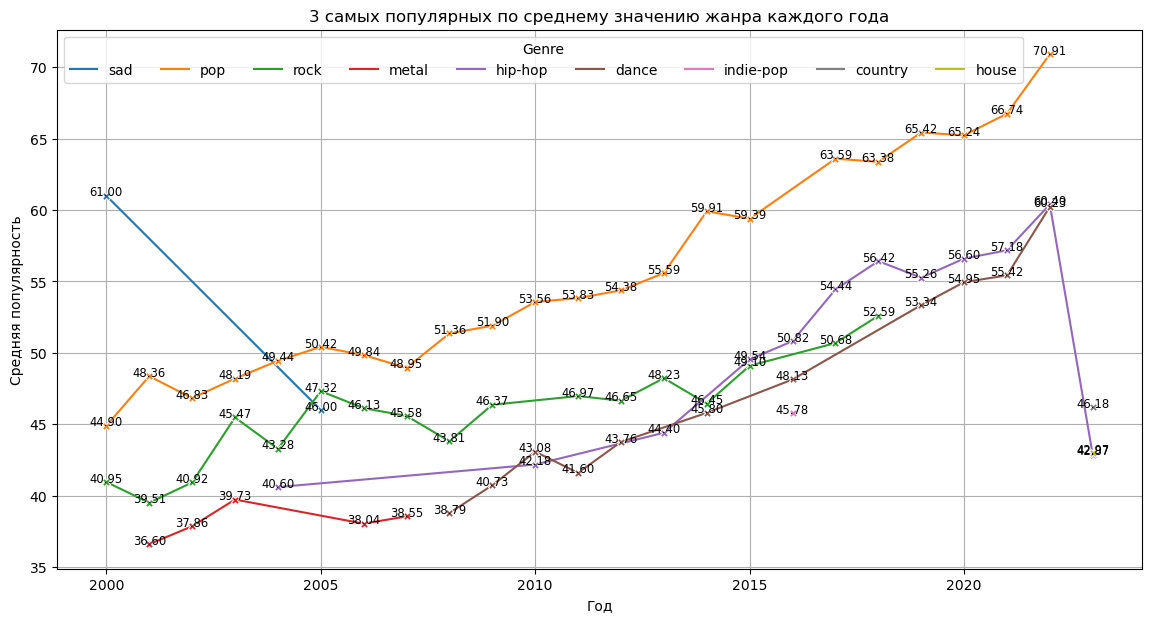

какие жанры оказывались в топ-3 чаще всего
genre
pop          22
rock         17
hip-hop      12
dance        11
metal         5
sad           2
indie-pop     1
country       1
house         1


In [8]:
#tf = df[df['year'] <= 2003]
tf =df.groupby(['year', 'genre'])['popularity'].mean().reset_index()
three_popular = tf.groupby(['year']).apply(lambda x: x.nlargest(3, 'popularity')).reset_index(drop=True)
#three genre for each year
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='popularity', data=three_popular, hue ='genre', marker='X')
for i in range(three_popular.shape[0]):
    plt.text(three_popular['year'].iloc[i], three_popular['popularity'].iloc[i],
             f"{three_popular['popularity'].iloc[i]:.2f}",
             horizontalalignment='center', size='small')
gen = three_popular['genre'].nunique()
plt.title('3 самых популярных по среднему значению жанра каждого года')
plt.xlabel('Год')
plt.ylabel('Средняя популярность')
plt.legend(title='Genre', ncol=gen)
plt.grid()
plt.show()
gene = three_popular['genre'].value_counts()
print('какие жанры оказывались в топ-3 чаще всего')
print(gene.to_string())

### 4. Как связаны между собой Speechiness, Acousticness и Instrumentalness?

**Результат**: Код, реализующий 2 различных по типу графика. Выбранные графики должны наиболее хорошо подходить для описания зависимости между указанными параметрами.

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Текстовый ответ, почему были выбраны именно такие графики.
**Ответ**:3Д наиболее наглядно показывает свзязь между тремя переменными, а второй просто красивый.

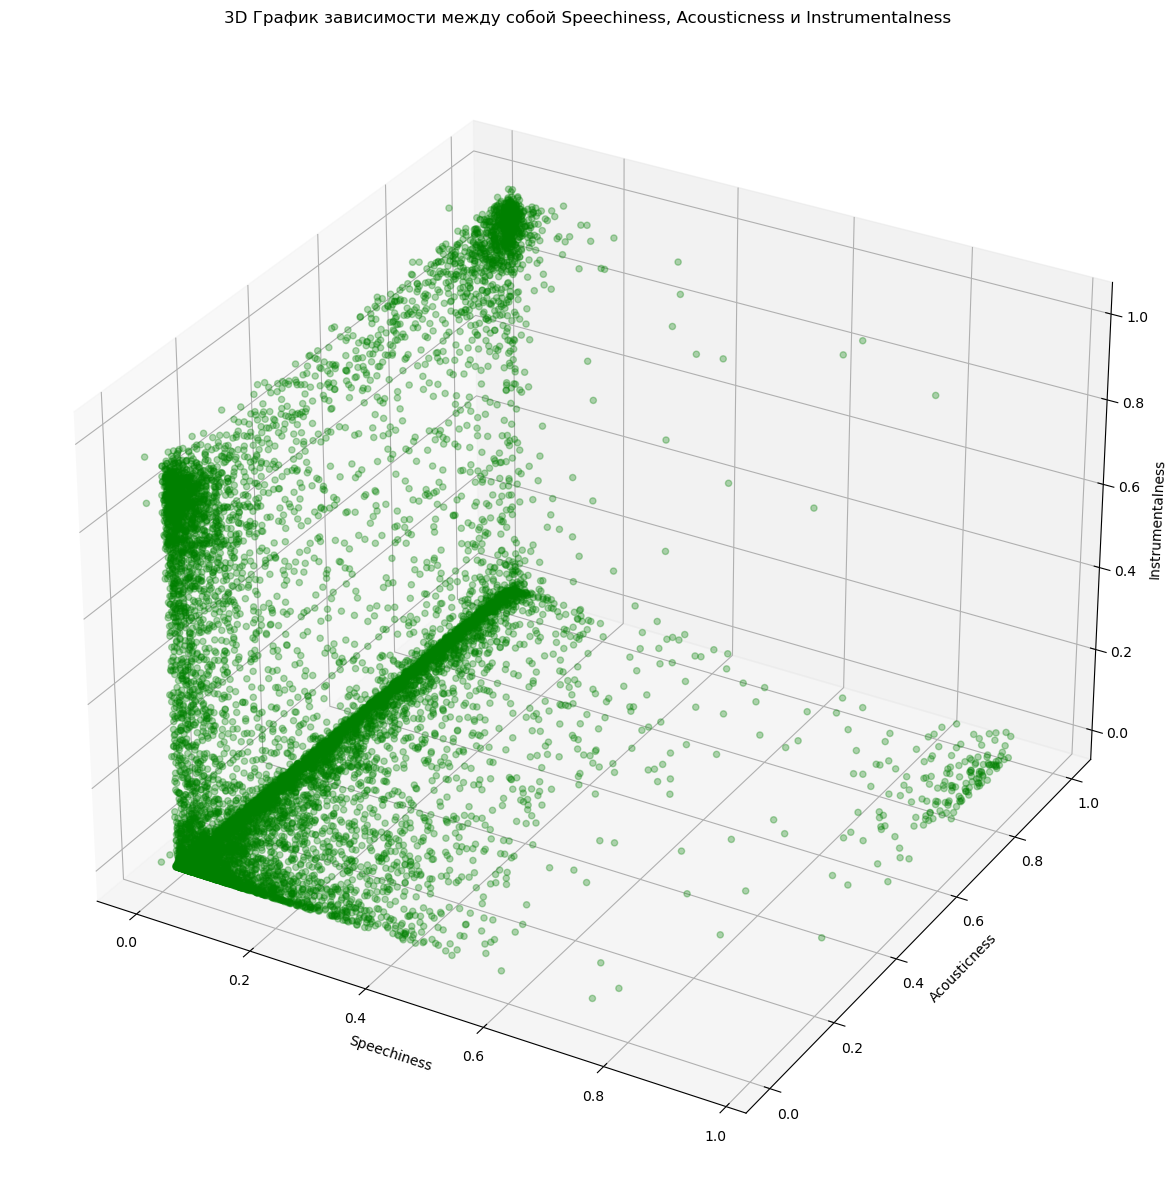

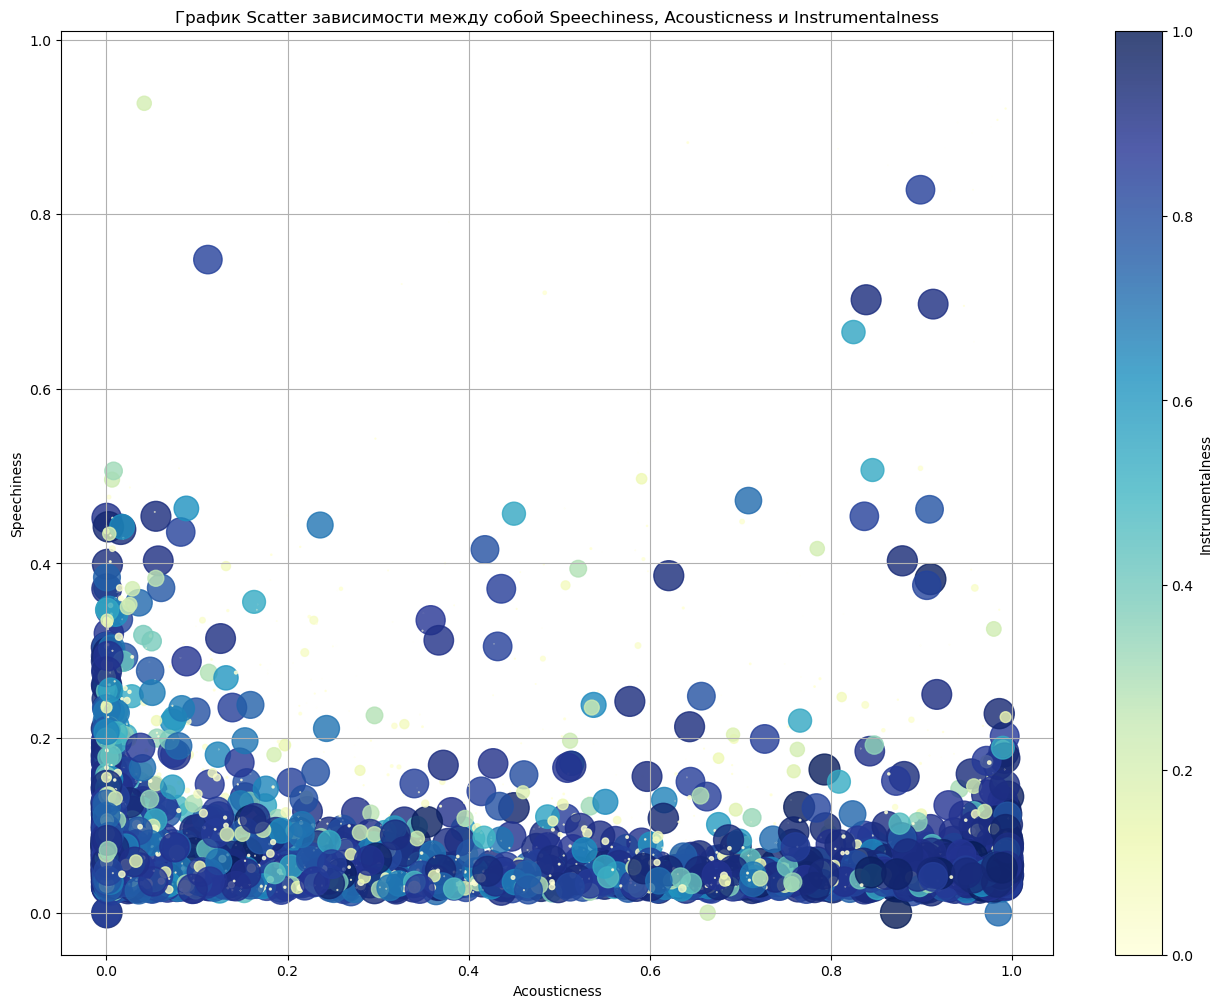

In [9]:
df_s = df.sample(frac=0.01)
fig = plt.figure(figsize=(20,15))
ax0 = fig.add_subplot(projection='3d')
ax0.scatter(df_s['speechiness'], df_s['acousticness'], df_s['instrumentalness'], alpha=0.3, c='g')
ax0.set_xlabel('Speechiness')
ax0.set_ylabel('Acousticness')
ax0.set_zlabel('Instrumentalness')
ax0.set_title('3D График зависимости между собой Speechiness, Acousticness и Instrumentalness')
plt.grid()
plt.show()
figg = plt.figure(figsize=(16, 12))
grap = plt.scatter(df_s['acousticness'], df_s['speechiness'], s=df_s['instrumentalness']*500,  c=df_s['instrumentalness'], cmap='YlGnBu',  alpha=0.8)
col = plt.colorbar(grap, label='Instrumentalness')
plt.title('График Scatter зависимости между собой Speechiness, Acousticness и Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Speechiness')
plt.grid()
plt.show()

### 5. Какое влияние размер и лад оказывают на популярность в разных жанрах?

**Результат**: Код, реализующий фигуру:

- Жанры для сравнения: deep-house, funk, forro, dancehall, house.
- Точечный график для каждого жанра, отражающий среднюю популярность в зависимости от размера (time_signature) и лада (mode).

Фигура должна иметь название и легенду, каждый график имеет подписанные оси и название.

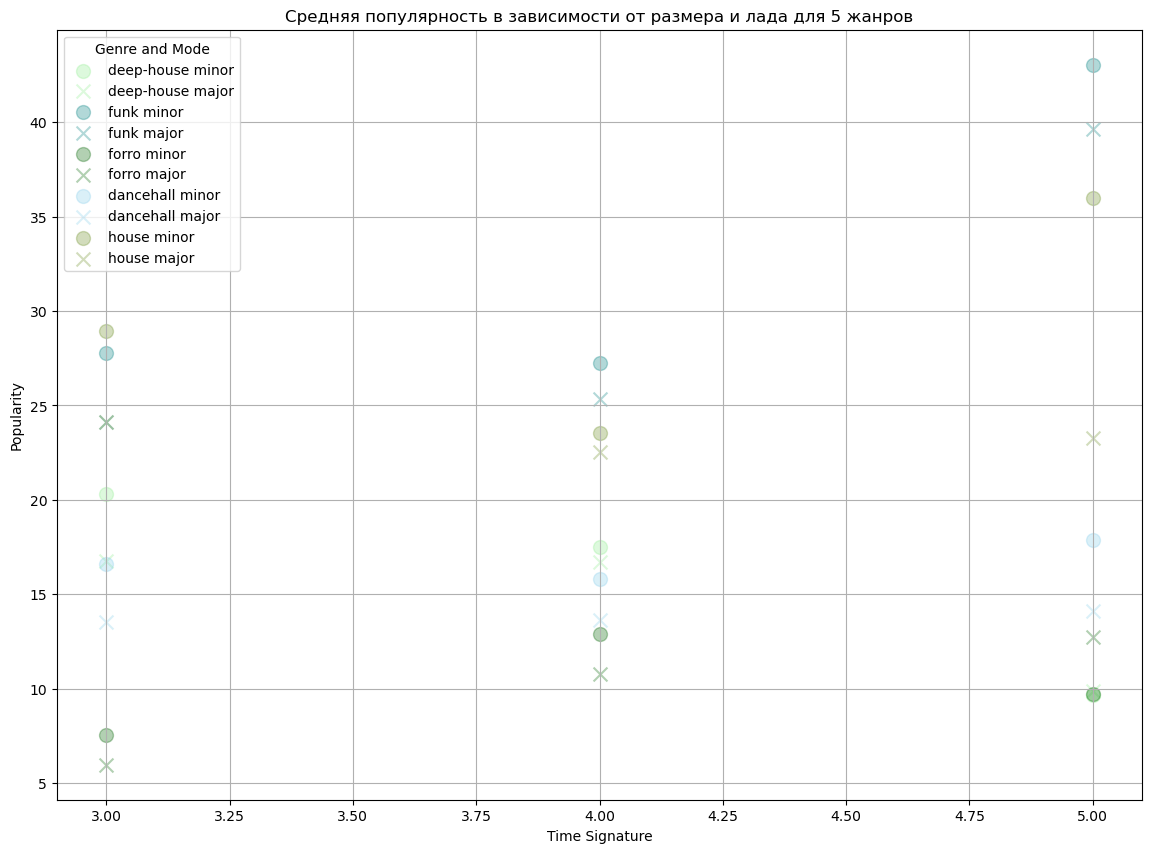

In [10]:
gen = ['deep-house', 'funk', 'forro', 'dancehall', 'house']
df_f= df[df['genre'].isin(gen)]#sorted with genre
rf = df_f.groupby(['genre', 'time_signature', 'mode']).agg({'popularity': 'mean'}).reset_index()
plt.figure(figsize=(14,10))
colors = {
    'deep-house':'lightgreen',
    'funk':'teal',
    'forro':'darkgreen',
    'dancehall':'skyblue',
    'house':'olivedrab'
}
markers = {0: 'o', 1: 'x' }  
markers_names = {0: 'minor', 1: 'major' }
for genre in gen:
    for mode in [0, 1]:
        dat = rf[(rf['genre'] == genre) & (rf['mode'] == mode)]
        plt.scatter(dat['time_signature'], dat['popularity'],
                    color=colors[genre], marker=markers[mode], s=100,
                    label=f'{genre} {markers_names[mode]}', alpha=0.3)
plt.title('Средняя популярность в зависимости от размера и лада для 5 жанров')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.legend(title='Genre and Mode',loc='upper left')
plt.grid(True)
plt.show()

### 6. Как выглядят нормальные распределения, построенные для темпа по уникальным значениям размера трека?
**Результат**: Код, реализующий графики распределения темпа (tempo) для всех уникальных значений размера трека (time_signature).

Фигура должна иметь название и легенду. Распределения должны быть построены либо на одном графике, либо на нескольких графиках, но в рамках одной фигуры.

**Дополнительно**: Код с ответом на вопрос, какие параметры (среднее и разброс) для нормальных распределений темпа для размера трека.

time signature - 3, mean tempo - 119.9, std tempo - 34.9
time signature - 4, mean tempo - 121.7, std tempo - 29.1
time signature - 5, mean tempo - 113.8, std tempo - 31.2


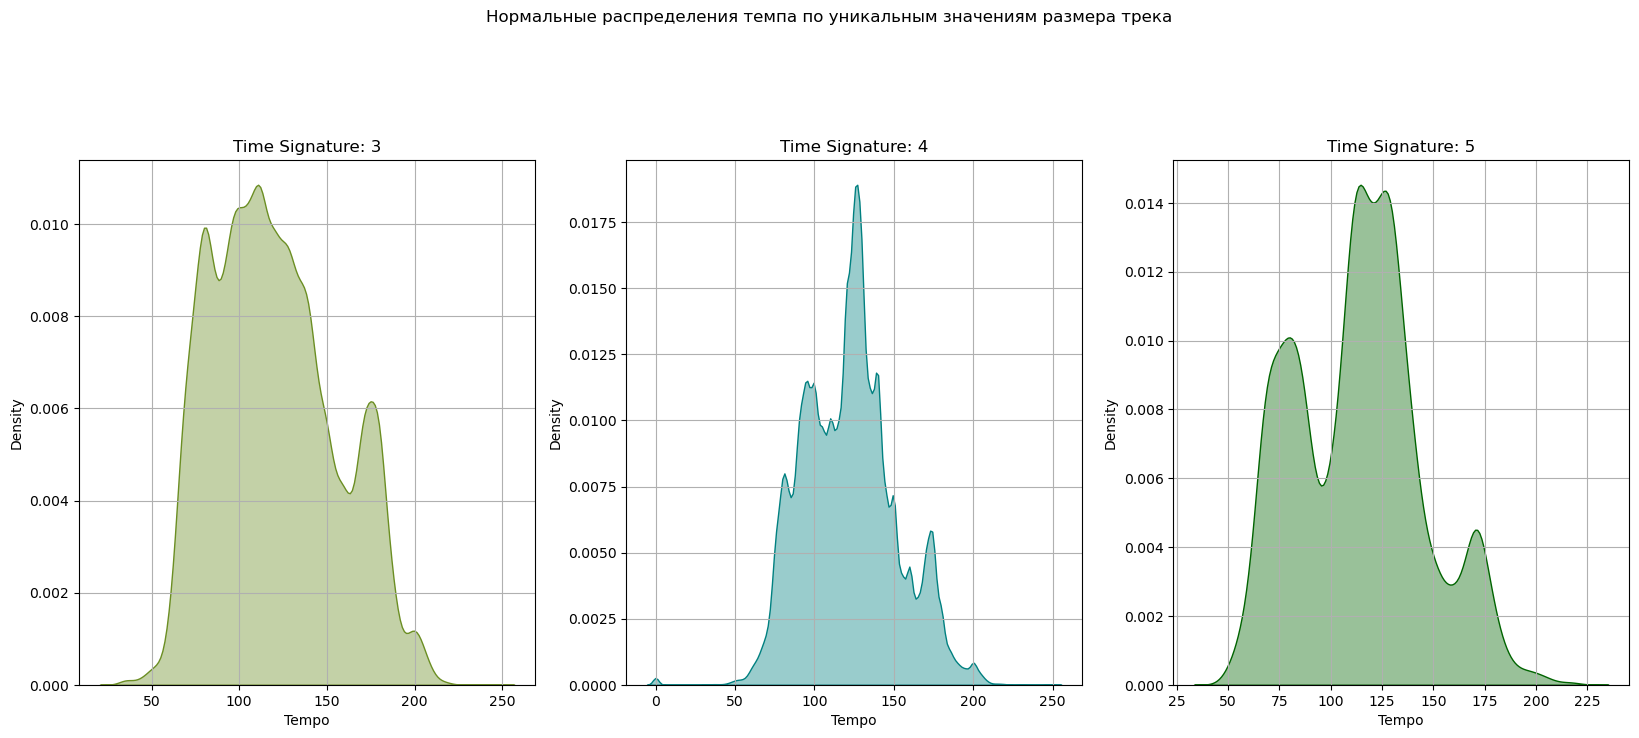

In [11]:
#Очень медленно прогружается
ts = df['time_signature'].unique()
plt.figure(figsize=(20, 15))
colors = {
    1:'olivedrab',
    2:'teal',
    3:'darkgreen'
}
p=1
for i in ts:
    tempo=df[df['time_signature'] == i]['tempo']
    mean_tempo = tempo.mean()
    std_tempo = tempo.std()
    print(f'time signature - {i}, mean tempo - {mean_tempo:.1f}, std tempo - {std_tempo:.1f}')
    plt.subplot(2, 3, p)
    sns.kdeplot(tempo,fill = True, color=colors[p], alpha=0.4)
    plt.title(f'Time Signature: {i}')#Это и есть легенда фактически
    plt.xlabel('Tempo')
    plt.ylabel('Density')
    plt.grid(True)
    p+=1
plt.suptitle('Нормальные распределения темпа по уникальным значениям размера трека')
plt.show()

### 7. Проанализируйте популярность одного артиста (группы) с 10-100 треками на Ваш выбор. 

**Результат**: Код, реализующий следующие графики:

- График, отражающий динамику суммарной популярности артиста год от года. Укажите стрелками с подписями, благодаря каким треками артист был на пике и на дне популярности.
- Сопоставьте признаки для этих двух треков, в виде графиков на Ваш выбор. Укажите, какие из признаков вероятнее всего оказали наибольшее влияние на популярность выбранных треков.

Графики должны находится в одной фигуре, имеющей название. Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Cудя по графикам, громкость была наименее важна, а 'danceability' и 'tempo' были самыми важными факторами.**

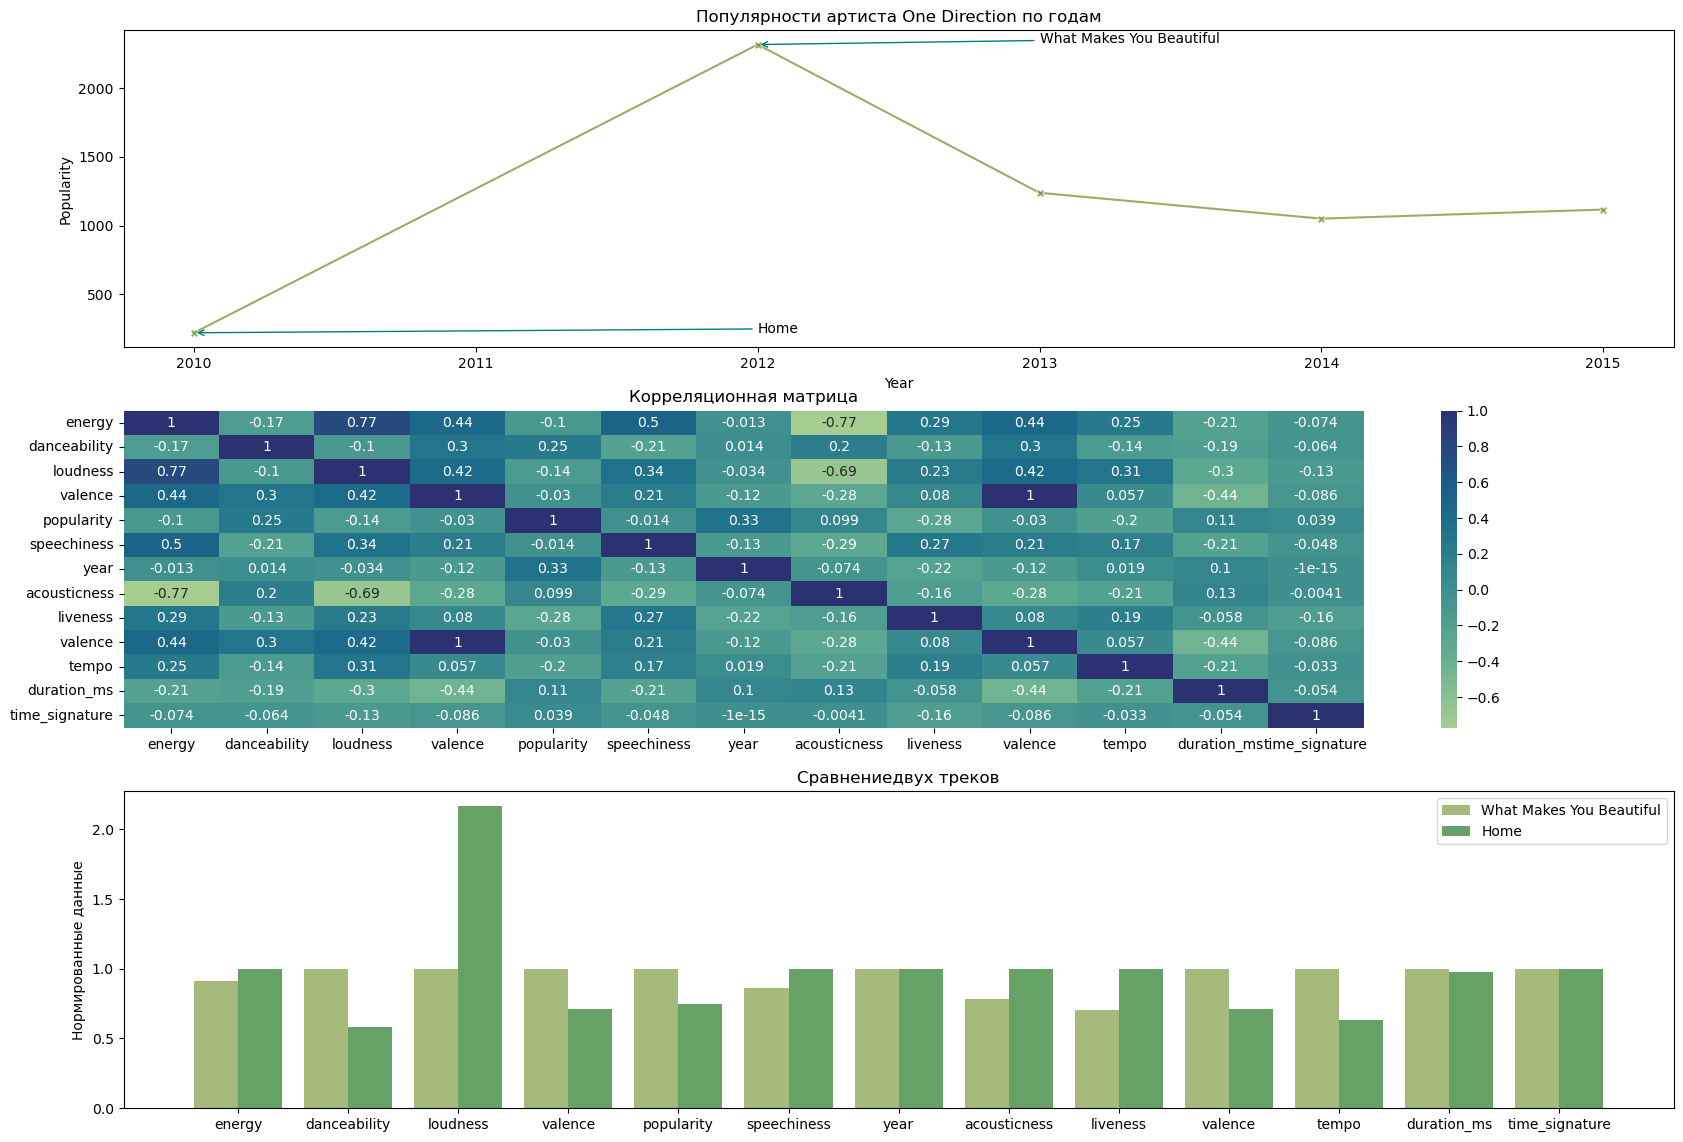

In [12]:
hisname = 'One Direction'
af = df[df['artist_name'] == hisname].groupby('year')['popularity'].sum().reset_index()
maxp = af.loc[af['popularity'].idxmax()]
minp= af.loc[af['popularity'].idxmin()]
best = df[(df['artist_name'] == hisname) & (df['year'] == maxp['year'])].nlargest(1, 'popularity').iloc[0]
worst = df[(df['artist_name'] == hisname) & (df['year'] == minp['year'])].nlargest(10, 'popularity').iloc[0]
plt.figure(figsize=(20, 14))
plt.subplot(3, 1, 1)
ax0 = sns.lineplot(data=af, x='year', y='popularity', marker='X', color='olivedrab',alpha=0.7)
plt.title(f'Популярности артиста {hisname} по годам')
plt.xlabel('Year')
plt.ylabel('Popularity')
arrowprops = {'arrowstyle': '->','color': 'teal'}
ax0.annotate(best['track_name'],
             xy=(maxp['year'],maxp['popularity']),
             xytext=(maxp['year']+1 , maxp['popularity']+10),
             arrowprops=arrowprops)
ax0.annotate(worst['track_name'],
             xy=(minp['year'], minp['popularity']),
             xytext=(minp['year']+2, minp['popularity']),
             arrowprops=arrowprops)
plt.subplot(3,1,2)
types=['energy','danceability','loudness','valence','popularity','speechiness','year','acousticness',
       'liveness', 'valence','tempo','duration_ms','time_signature']
#убран параметр 'instrumentalness' из-за того, что нулевой и всё портит
corr_matrix = df[df['artist_name'] == hisname][types].corr()
ax1=sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.title('Корреляционная матрица')
plt.subplot(3,1,3)
bestv=[]
worstv=[]
#norm потому что есть 199987 и 0.008 и без диаграмма выглядит странно.
for i in types:
    maxx = max(abs(best[i]),(worst[i]))
    bestv.append(abs(best[i]/maxx))
    worstv.append(abs(worst[i]/maxx))
x = range(len(types))
plt.bar(x, bestv, width=0.4, label=best['track_name'], color='olivedrab', alpha=0.6)
plt.bar([j + 0.4 for j in x],worstv, width=0.4, label=worst['track_name'], color='darkgreen', alpha=0.6)
plt.xticks([j + 0.2 for j in x], types)
plt.ylabel('Нормированные данные')
plt.title('Сравнениедвух треков')
plt.legend()
plt.show()